# With quantstats

We support and recommend [quantstats](https://github.com/ranaroussi/quantstats)

In [1]:
import pandas as pd

from cvx.simulator import Builder

# Get rid of findfont: Font family 'Arial' not found.
# when running a remote notebook on Jupyter Server on Ubuntu Linux server
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [2]:
prices = pd.read_csv("data/stock-prices.csv", header=0, index_col=0, parse_dates=True) 

In [3]:
capital = 1e6

In [4]:
b = Builder(prices=prices, initial_aum=capital)

In [5]:
for t, state in b:
    # each day we invest a quarter of the capital in the assets
    b.position = (1.0 / len(state.assets)) * state.nav / state.prices
    b.aum = state.aum

In [6]:
portfolio= b.build()

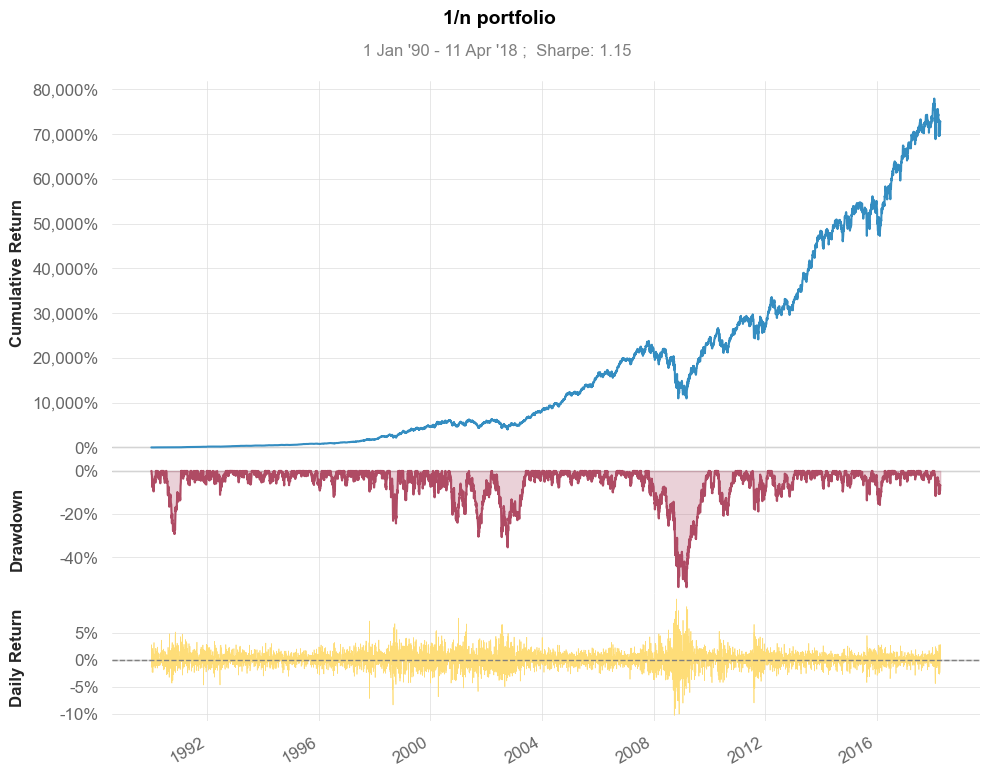

In [7]:
portfolio.snapshot(title="1/n portfolio", fontname=None, show=True)

In [8]:
# quantstats is extending pandas and adds methods such as sharpe() directly to pd.Series
print(portfolio.nav.sharpe())

1.1516253130515042


In [9]:
portfolio.metrics()

                    Strategy
------------------  ----------
Start Period        1990-01-02
End Period          2018-04-11
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   72,711.38%
CAGR﹪              17.45%

Sharpe              1.15
Prob. Sharpe Ratio  100.0%
Sortino             1.71
Sortino/√2          1.21
Omega               1.23

Max Drawdown        -53.76%
Longest DD Days     782

Gain/Pain Ratio     0.23
Gain/Pain (1M)      1.65

Payoff Ratio        1.04
Profit Factor       1.23
Common Sense Ratio  1.32
CPC Index           0.69
Tail Ratio          1.08
Outlier Win Ratio   3.93
Outlier Loss Ratio  3.72

MTD                 1.7%
3M                  -3.81%
6M                  -1.94%
YTD                 -0.14%
1Y                  4.66%
3Y (ann.)           7.01%
5Y (ann.)           9.49%
10Y (ann.)          8.97%
All-time (ann.)     17.45%

Avg. Drawdown       -2.79%
Avg. Drawdown Days  21
Recovery Factor     13.59
Ulcer Index         0.1
Serenity Index      5

In [10]:
portfolio.html(output="test.html")

/Users/a13069q/github/simulator/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/a13069q/github/simulator/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/a13069q/github/simulator/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass

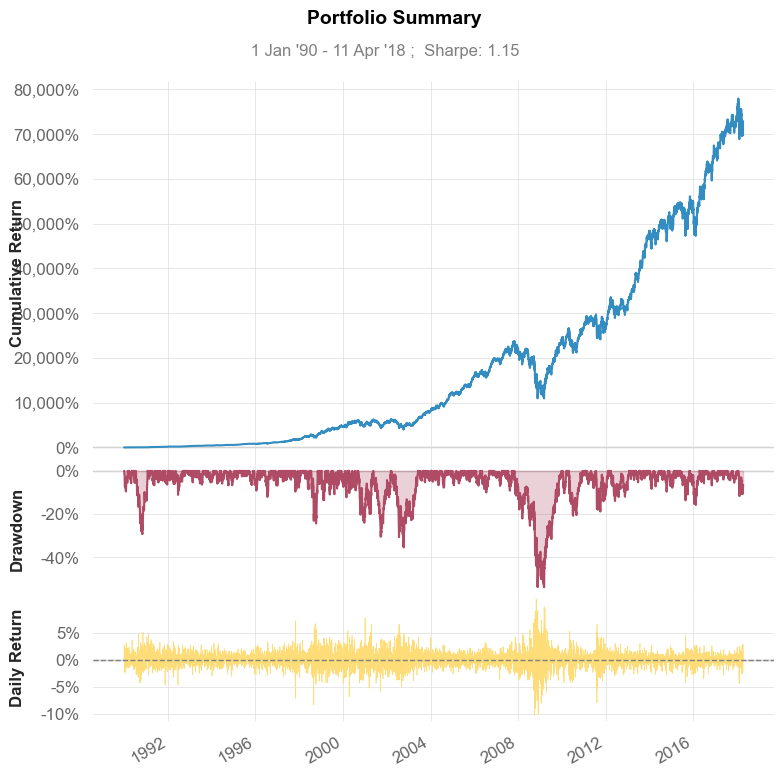

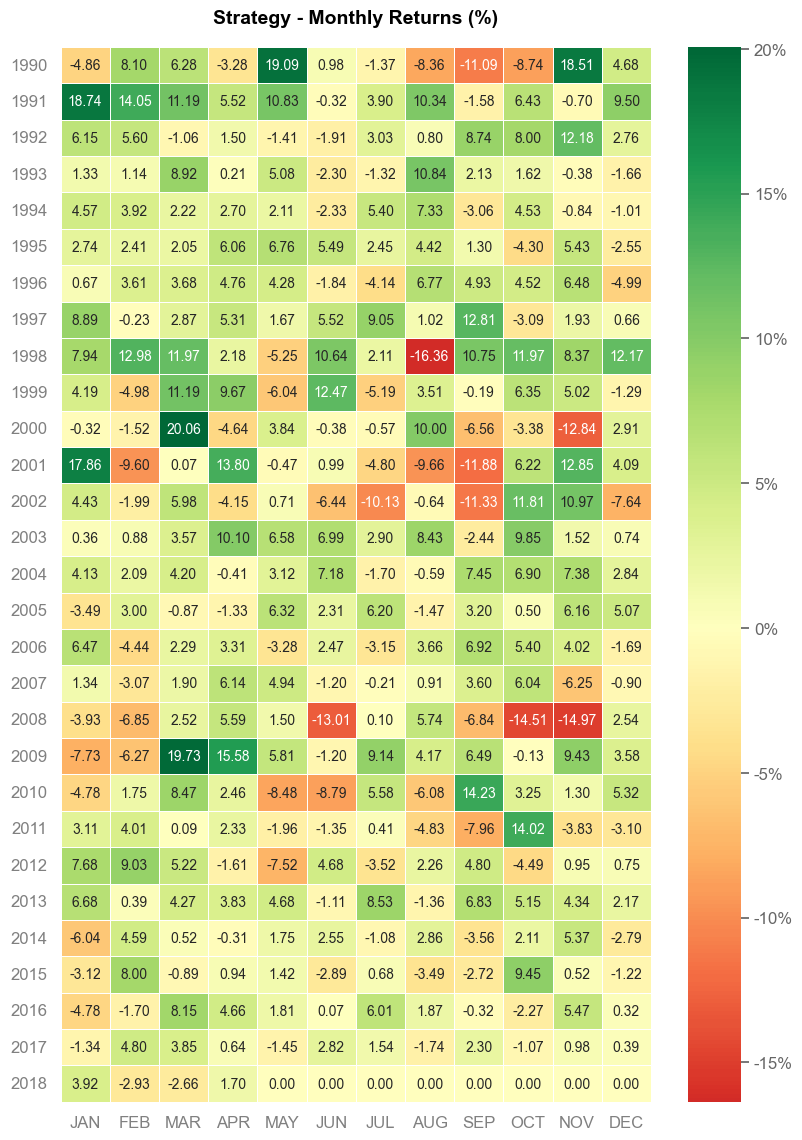

In [11]:
portfolio.plots()